## Imports

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import pathlib
import PIL
import os
import shutil
import splitfolders
import imagesize
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory
from datafunc import plot_example


## Data

In [2]:
datapath='../0. Project Data/Original Data'
org_data_dir = pathlib.Path(datapath).with_suffix('')
org_data_dir

WindowsPath('../0. Project Data/Original Data')

In [17]:
a=next(org_data_dir.glob('*/*.jpg'))

In [19]:
a

WindowsPath('../0. Project Data/Original Data/Blight/Corn_Blight (0).jpg')

In [21]:
width_max = 0
height_max = 0
for image in org_data_dir.glob('*/*.jpg'):
    width, height = imagesize.get(image)
    if width > width_max:
        width_max = width
    if height > height_max:
        height_max = height
print(width_max, height_max)

5184 5184


In [16]:
len(list(org_data_dir.glob('*/*.jpg')))

4187

In [ ]:
for image in org_data_dir.glob('*/*.jpg')

#### Loading Data

In [3]:
Blight = len(list(org_data_dir.glob('Blight/*.jpg')))
Common_Rust = len(list(org_data_dir.glob('Common_Rust/*.jpg')))
Gray_Leaf_Spot = len(list(org_data_dir.glob('Gray_Leaf_Spot/*.jpg')))
Healthy = len(list(org_data_dir.glob('Healthy/*.jpg')))
print('Blight images:', Blight)
print('Common Rust images:', Common_Rust)
print('Gray Leaf Spot images:', Gray_Leaf_Spot)
print('Healthy images:', Healthy)
print('Total images:', Blight + Common_Rust + Gray_Leaf_Spot + Healthy)

Blight images: 1145
Common Rust images: 1306
Gray Leaf Spot images: 574
Healthy images: 1162
Total images: 4187


#### Example Images

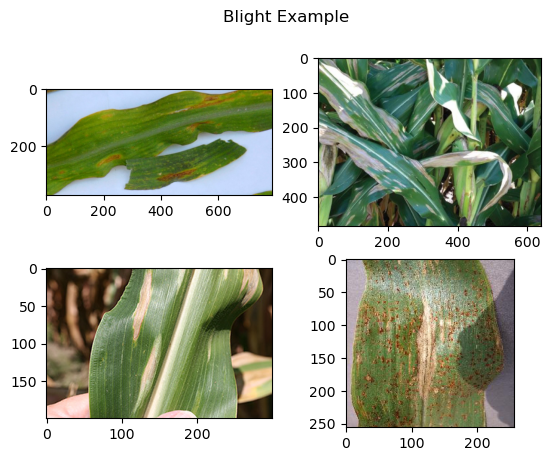

In [4]:
plot_example('Blight', org_data_dir)

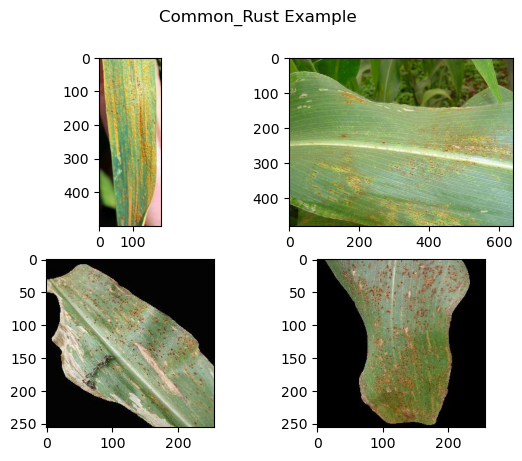

In [5]:
plot_example('Common_Rust', org_data_dir)

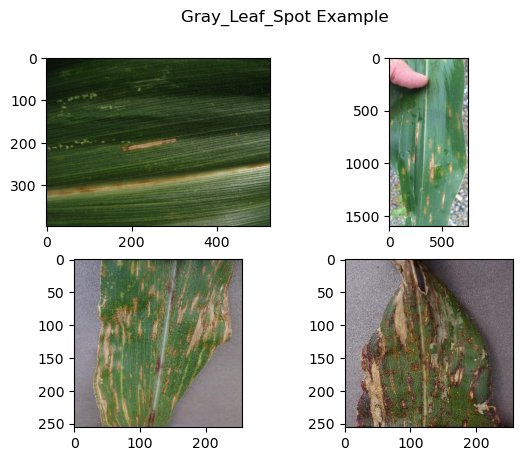

In [6]:
plot_example('Gray_Leaf_Spot', org_data_dir)

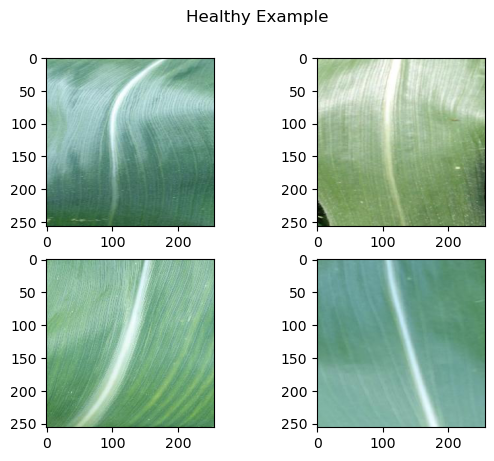

In [7]:
plot_example('Healthy', org_data_dir)

In [ ]:
corn_healthy_im = list(org_data_dir.glob('Healthy/*'))
PIL.Image.open(str(corn_healthy_im[0]))

In [ ]:
PIL.Image.open(str(corn_healthy_im[1]))

In [ ]:
train_split_test_dir='../0. Project Data/Split Data'
splitfolders.ratio(datapath, output=train_split_test_dir, seed=123, ratio=(.64, .16, .2)) # ratio of split are in order of train/val/test.

In [ ]:
train_ds = image_dataset_from_directory(
    train_split_test_dir + '/train',
    image_size=(180, 180),
    batch_size=32)
val_ds = image_dataset_from_directory(
    train_split_test_dir + '/val',
    image_size=(180, 180),
    batch_size=32)
test_ds = image_dataset_from_directory(
    train_split_test_dir + '/test',
    image_size=(180, 180),
    batch_size=32)

#### Image Parameters

In [ ]:
batch_size = 32
img_height = 180
img_width = 180
img_channels = 3

In [ ]:
# enginerring more data by applying randomized horizontal flips, zooms(+/- 20%), and rotates (+/- 10%)
data_augmentation = keras.Sequential([layers.RandomFlip("horizontal"), layers.RandomRotation(0.1), layers.RandomZoom(0.2),])

In [ ]:
inputs = keras.Input(shape=(img_height, img_width, img_channels))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(4, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='sgd', # Common optimizers include 'adam', 'sgd', and 'rmsprop'.
 loss='sparse_categorical_crossentropy', # Common loss functions include 'binary_crossentropy', 'categorical_crossentropy', and 'mse'.
 metrics=["accuracy"]) #Common metrics include 'accuracy', 'precision', 'recall', and 'f1_score'.

In [ ]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=15
)